# Normalize Data


- There are namy ways of quantizing (normalizing) the data
- The most popular is to normalize data in the range of 0 to 1
- I chose to represent data as Int8 (-128,127) because of the currently available 4 TOPS TPU ([Google Coral](https://www.amazon.com/s?k=Google+Coral&ref=bl_dp_s_web_0)) using [TensorFlow Lite](https://coral.ai/docs/edgetpu/models-intro/)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Normalize-Data" data-toc-modified-id="Normalize-Data-1">Normalize Data</a></span></li><li><span><a href="#Fetch-DataFrame-from-the-CSV-file" data-toc-modified-id="Fetch-DataFrame-from-the-CSV-file-2">Fetch DataFrame from the CSV file</a></span></li><li><span><a href="#Explore-the-Dataset" data-toc-modified-id="Explore-the-Dataset-3">Explore the Dataset</a></span><ul class="toc-item"><li><span><a href="#Describe-the-original-data" data-toc-modified-id="Describe-the-original-data-3.1">Describe the original data</a></span></li><li><span><a href="#Number-the-column-names" data-toc-modified-id="Number-the-column-names-3.2">Number the column names</a></span></li><li><span><a href="#Plot-the-original-data" data-toc-modified-id="Plot-the-original-data-3.3">Plot the original data</a></span></li></ul></li><li><span><a href="#Function-to-normalize-the-data" data-toc-modified-id="Function-to-normalize-the-data-4">Function to normalize the data</a></span></li><li><span><a href="#Draw-plots" data-toc-modified-id="Draw-plots-5">Draw plots</a></span></li><li><span><a href="#Write-DataFrame-to-the-CSV-file" data-toc-modified-id="Write-DataFrame-to-the-CSV-file-6">Write DataFrame to the CSV file</a></span></li></ul></div>

# Fetch DataFrame from the CSV file

In [1]:
date_format = "yyyy.mm.dd" # 2007.04.05

include("available_datasets.jl") 
dataset_file_name = available_datasets()[14,2] # row 5, column 2 = TPLGX.csv

include("fetch_dataset.jl") 
df = fetch_dataset(dataset_file_name, date_format)

size(df)

usage: df = available_datasets() # returns a DataFrame with all available data sets (name, file_path)
usage: dataset_file_name = available_datasets()[5,2] # 5th dataset: DJIA, 2nd column: file-name

        usage: 
            include("available_datasets.jl") 
            dataset_file_name = available_datasets()[5,2] # row 5, column 2 = DJIA
            df = fetch_dataset(dataset_file_name)
    


(254, 7)

# Explore the Dataset

## Describe the original data

In [2]:
#using Statistics 
describe(df[:, 2])

LoadError: MethodError: no method matching describe(::Array{Float64,1})
Closest candidates are:
  describe(!Matched::AbstractDataFrame; cols) at C:\Users\UkiDL\.julia\packages\DataFrames\cdZCk\src\abstractdataframe\abstractdataframe.jl:540
  describe(!Matched::AbstractDataFrame, !Matched::Union{Symbol, Pair{var"#s38",B} where B where var"#s38"<:Union{AbstractString, Symbol}}...; cols) at C:\Users\UkiDL\.julia\packages\DataFrames\cdZCk\src\abstractdataframe\abstractdataframe.jl:537
  describe(!Matched::IO, !Matched::AbstractDataFrame, !Matched::Union{Symbol, Pair{Symbol,B} where B}...; cols) at deprecated.jl:70

## Number the column names

In [3]:
# sample the values in the columns
columns = names(df)
for i in 1:length(columns)
    println(i, " ", columns[i])
end

1 Date
2 Open
3 High
4 Low
5 Close
6 Adj Close
7 Volume


## Plot the original data

In [4]:
using Plots

rows = 1:length(df[rows,6])
gr()
plot(df[ rows,1 ], 
    [           df[rows,6]   ], 
    label    = [columns[6]   ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 300), # width, height
    layout = (1, 1)
    )

LoadError: UndefVarError: rows not defined

# Function to normalize the data

- takes a column (an array) of data as an input
- calculates minimum value of the column
- calculates maximum value of the column
- for each row it calculates:

$$ normalized_i = \frac{(value_i - min_{all})}{(max_{all} - min_{all})} $$

OR 

$$ x_i = \frac{(x_i - μ)}{σ} $$

where:
- μ  - **mean** of the whole population
- σ - **standard deviation** of the whole population

In [5]:
println("minimum(original): ", minimum(df[6]) )
println("maximum(original): ", maximum(df[6]) )

include("quantize.jl")
data_normalized = quantize_column!(df, 6)

println("minimum(original): ", minimum(df[6]) )
println("maximum(original): ", maximum(df[6]) )

minimum(original): 37.110001
maximum(original): 65.529999
bias for 0 value: -1.3057707111731671
minimum(original): -128.0
maximum(original): 127.0


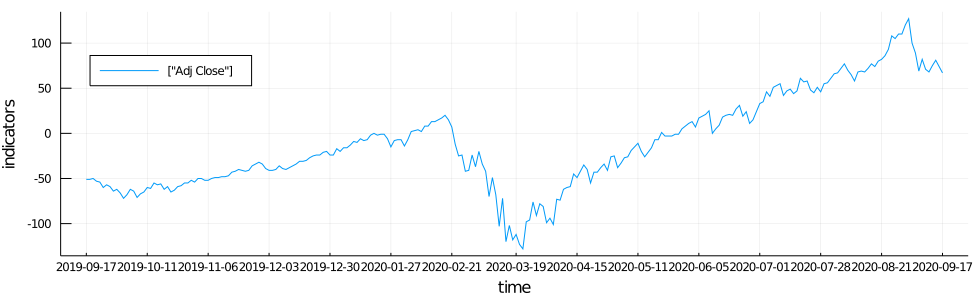

In [6]:
using Plots

rows = 1:254
gr()
plot(df[ rows,1 ], 
    [           df[rows,6]   ], 
    label    = [columns[6]   ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 300), # width, height
    layout = (1, 1)
    )

# Draw plots

If the normalization above was done right, the plots retain exactly same shape, regardless that y-axis (vertical) is scaled.

- https://docs.juliaplots.org/latest/layouts/

In [7]:
gr()
plot(periods, 
    [df[:,original_column]  df[:,normalized_column]  ], 
    label    = ["original" "normalized"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1750, 600), # width, height
    layout = (2, 1)
    )

LoadError: UndefVarError: original_column not defined

# Write DataFrame to the CSV file

In [8]:
CSV.write(file_name, df, delim=',', header=true)

LoadError: UndefVarError: file_name not defined

In [9]:
show(df[:,original_column:normalized_column], allcols=true)

LoadError: UndefVarError: original_column not defined

In [10]:
data1 = df[:,4] # Manufacturing
data2 = df[:,6]

gr()
plot(periods, 
    [ data1  data2 ], 
    label    = ["ISM Manufacturing norm." "GDP q/q norm."],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1750, 600), # width, height
    layout = (1, 1)
    )

LoadError: UndefVarError: periods not defined